In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
files = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ocean-eddy-detection/eddies_train.nc
/kaggle/input/ocean-eddy-detection/OSSE_U_V_SLA_SST_test.nc
/kaggle/input/ocean-eddy-detection/OSSE_U_V_SLA_SST_train.nc


In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
eddies_train = xr.open_dataset(files[0])
OSSE_test = xr.open_dataset(files[1])
OSSE_train = xr.open_dataset(files[2])
OSSE_train = OSSE_train.rename({"time_counter":"time"})

In [4]:
OSSE_train

<xarray.Dataset>
Dimensions:    (latitude: 357, longitude: 717, time: 284)
Coordinates:
    deptht     float32 ...
  * latitude   (latitude) float32 -1.084e-19 2.967 0.0 ... 3.689e+19 3.099 0.0
  * longitude  (longitude) float32 3.689e+19 -3.352 0.0 ... -3.221 0.0
  * time       (time) datetime64[ns] 2015-01-02T12:00:00 ... 2015-12-25T12:00:00
Data variables:
    vomecrtyT  (time, latitude, longitude) float32 ...
    vozocrtxT  (time, latitude, longitude) float32 ...
    sossheig   (time, latitude, longitude) float32 ...
    votemper   (time, latitude, longitude) float32 ...
Attributes:
    history:  Mon Feb 20 14:04:07 2023: ncks -A SST_2015_merged.nc SSH_U_V_20...
    NCO:      4.4.7

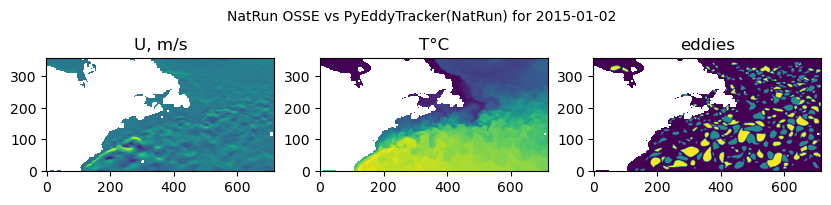

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (10, 10))
ax[0].imshow(OSSE_train.vozocrtxT.values[0], origin = "lower")#, extent = [lat_min, lon_min, lat_max, lon_max])
ax[0].set_title("U, m/s")
#ax[0].colorbar()
ax[1].imshow(OSSE_train.votemper.values[0], origin = "lower")#, extent = [lat_min, lon_min, lat_max, lon_max])
ax[1].set_title("T°C")
ax[2].imshow(eddies_train.eddies.values[0], origin = "lower")#, extent = [lat_min, lon_min, lat_max, lon_max])
ax[2].set_title("eddies")
fig.suptitle("NatRun OSSE vs PyEddyTracker(NatRun) for "+str(OSSE_train.time.values[0])[:10], fontsize = 10, y = 0.6)
#fig
plt.savefig("./test.png")